In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
bc = pd.read_csv("Churn_modelling.csv")

In [3]:
bc.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bc.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
bc.shape

(10000, 14)

In [6]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
bc.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
bc.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
bc.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
bc.isnull().sum().value_counts()

0    14
dtype: int64

In [11]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
#Data Preprocessing

In [13]:
pd.Categorical(bc)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', ..., 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Length: 14
Categories (14, object): ['Age', 'Balance', 'CreditScore', 'CustomerId', ..., 'NumOfProducts', 'RowNumber', 'Surname', 'Tenure']

In [14]:
for feature in bc.columns:
    if bc[feature].dtype =="object":
        bc[feature]= pd.Categorical(bc[feature]).codes

In [15]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int16  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int8   
 5   Gender           10000 non-null  int8   
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int16(1), int64(9), int8(2)
memory usage: 898.6 KB


In [16]:
bcdroped = bc.drop("RowNumber", axis = 1)

In [17]:
bcdroped = bcdroped.drop("CustomerId", axis = 1)

In [18]:
bcdroped = bcdroped.drop("Surname", axis = 1)

In [19]:
bcdroped.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [20]:
bcdroped.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
#Univariate Analysis

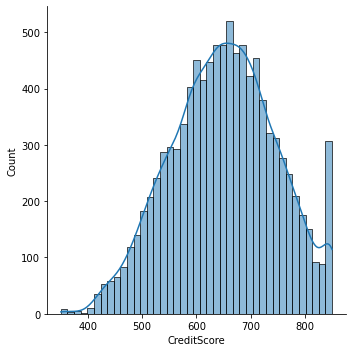

In [22]:
sns.displot(bcdroped["CreditScore"], kde = True)

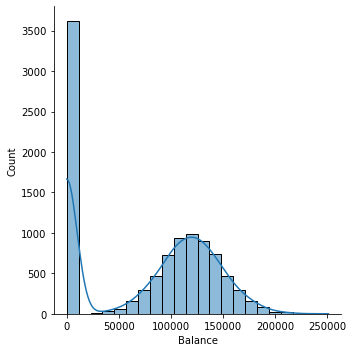

In [23]:
sns.displot(bcdroped["Balance"], kde = True)

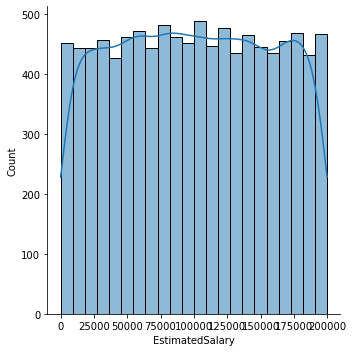

In [24]:
sns.displot(bcdroped["EstimatedSalary"], kde = True)

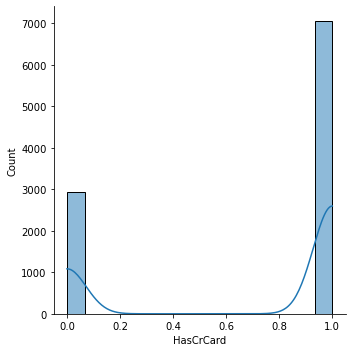

In [25]:
sns.displot(bcdroped["HasCrCard"], kde = True)

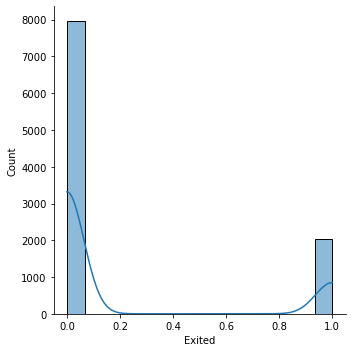

In [26]:
sns.displot(bcdroped["Exited"], kde = True)

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

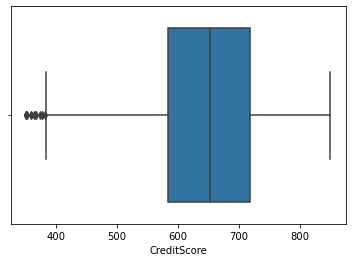

In [28]:
sns.boxplot(bcdroped["CreditScore"] ,orient = "h")

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

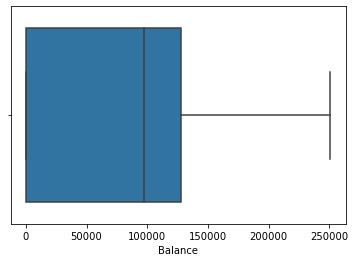

In [29]:
sns.boxplot(bcdroped["Balance"] ,orient = "h")

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

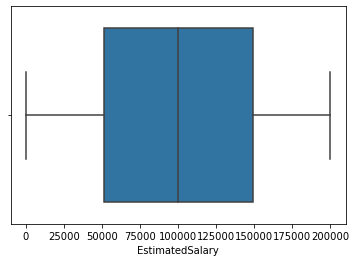

In [30]:
sns.boxplot(bcdroped["EstimatedSalary"] ,orient = "h")

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

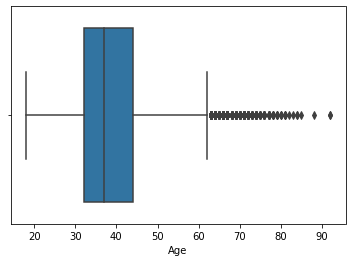

In [32]:
sns.boxplot(bcdroped["Age"], orient = "h")

In [33]:
#Bivariate Analysis

In [34]:
bcdroped.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='Geography'>

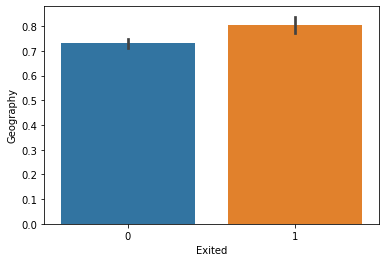

In [35]:
sns.barplot(bcdroped["Exited"], bcdroped["Geography"])

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts', ylabel='Geography'>

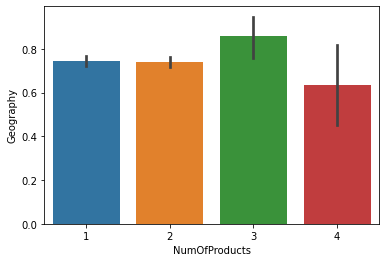

In [36]:
sns.barplot(bcdroped["NumOfProducts"], bcdroped["Geography"])

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='HasCrCard'>

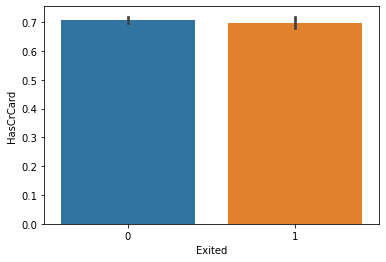

In [37]:
sns.barplot(bcdroped["Exited"], bcdroped["HasCrCard"])

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='Gender'>

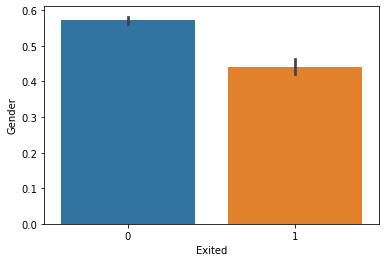

In [38]:
sns.barplot(bcdroped["Exited"], bcdroped["Gender"])

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

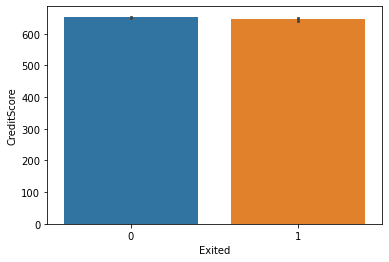

In [39]:
sns.barplot(bcdroped["Exited"], bcdroped["CreditScore"])

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='Age'>

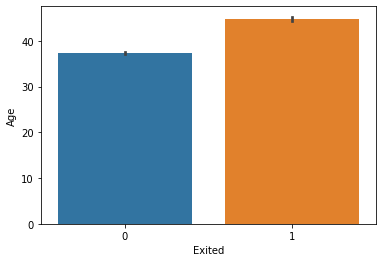

In [40]:
sns.barplot(bcdroped["Exited"], bcdroped["Age"])

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

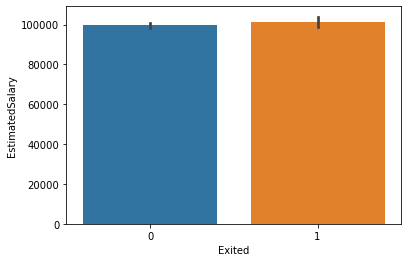

In [41]:
sns.barplot(bcdroped["Exited"], bcdroped["EstimatedSalary"])

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='Balance'>

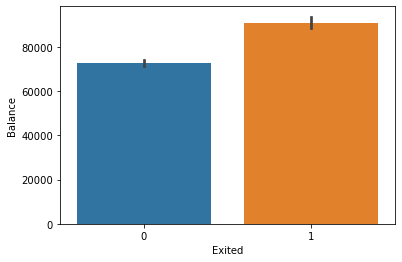

In [42]:
sns.barplot(bcdroped["Exited"], bcdroped["Balance"])

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

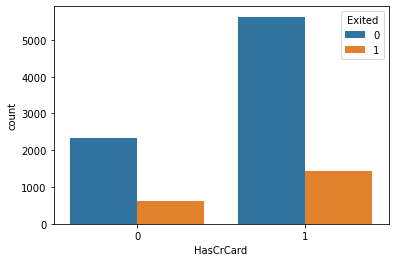

In [43]:
sns.countplot(bcdroped["HasCrCard"], hue = bcdroped["Exited"])

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='Balance'>

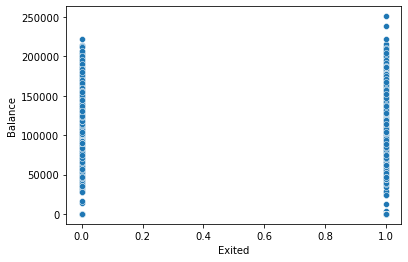

In [44]:
sns.scatterplot(bcdroped["Exited"], bcdroped["Balance"])

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='Balance'>

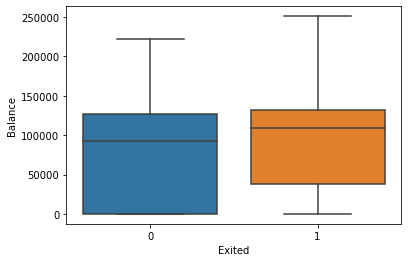

In [45]:
sns.boxplot(bcdroped["Exited"], bcdroped["Balance"])

In [46]:
# Multivariate Analysis

In [47]:
bcdroped.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='Balance'>

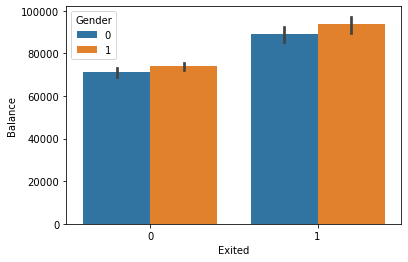

In [48]:
sns.barplot(bcdroped["Exited"], bcdroped["Balance"], hue = bcdroped["Gender"])

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

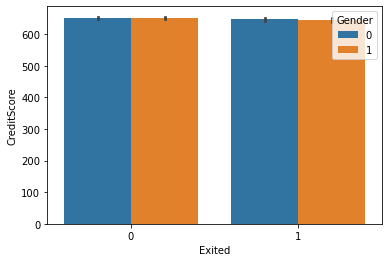

In [49]:
sns.barplot(bcdroped["Exited"], bcdroped["CreditScore"], hue = bcdroped["Gender"])

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

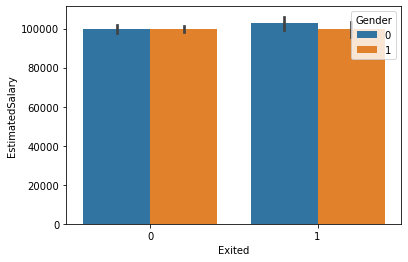

In [50]:
sns.barplot(bcdroped["Exited"], bcdroped["EstimatedSalary"], hue = bcdroped["Gender"])

In [51]:
bcdroped.Gender

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int8

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='Balance'>

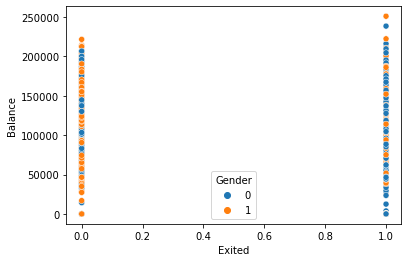

In [52]:
sns.scatterplot(bcdroped["Exited"], bcdroped["Balance"], hue = bcdroped["Gender"])

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

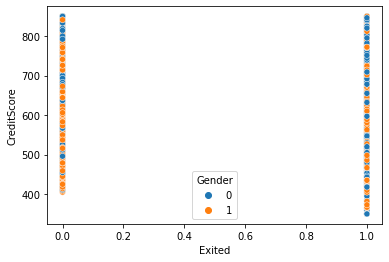

In [53]:
sns.scatterplot(bcdroped["Exited"], bcdroped["CreditScore"], hue = bcdroped["Gender"])

C:\Users\u\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

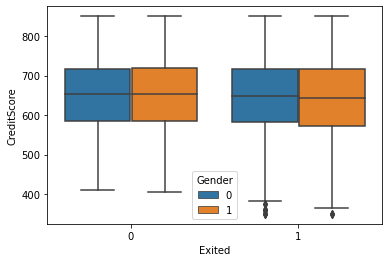

In [54]:
sns.boxplot(bcdroped["Exited"], bcdroped["CreditScore"], hue = bcdroped["Gender"])

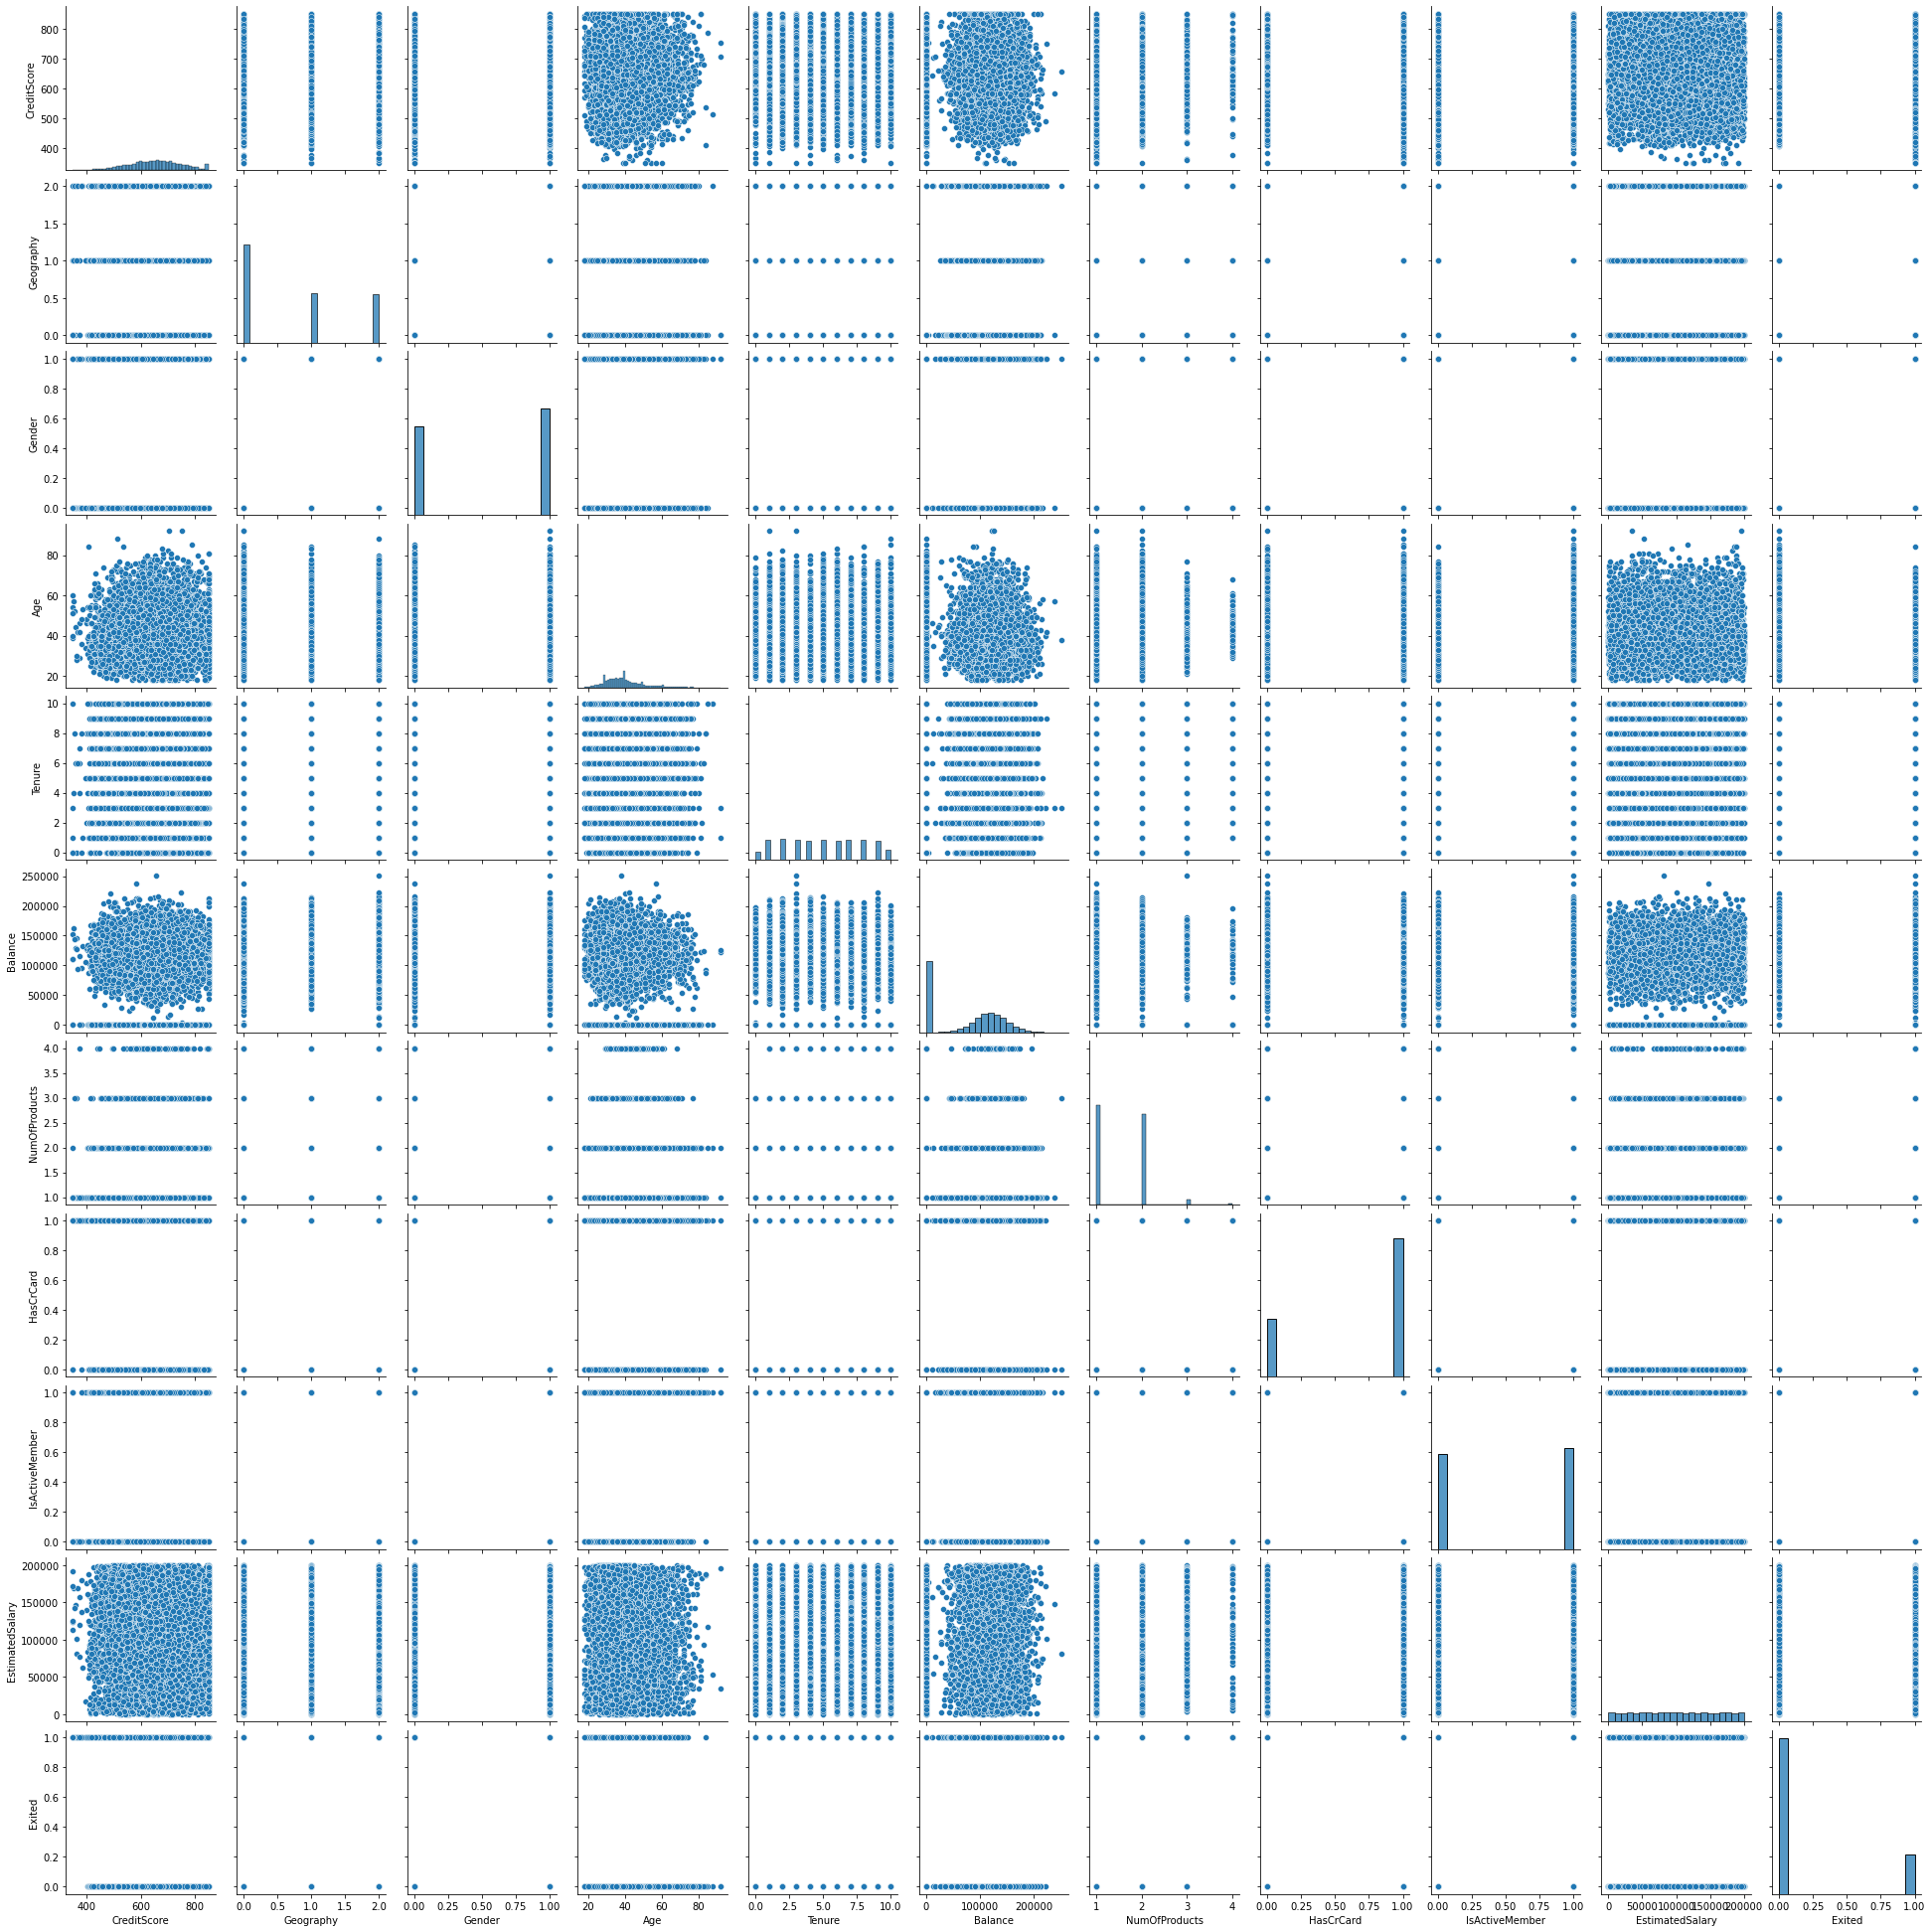

In [55]:
sns.pairplot(bcdroped)

In [56]:
# Correlation

In [57]:
bcdroped.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [58]:
from matplotlib import RcParams

In [59]:
plt.rcParams['figure.figsize'] = (12,8)

<AxesSubplot:>

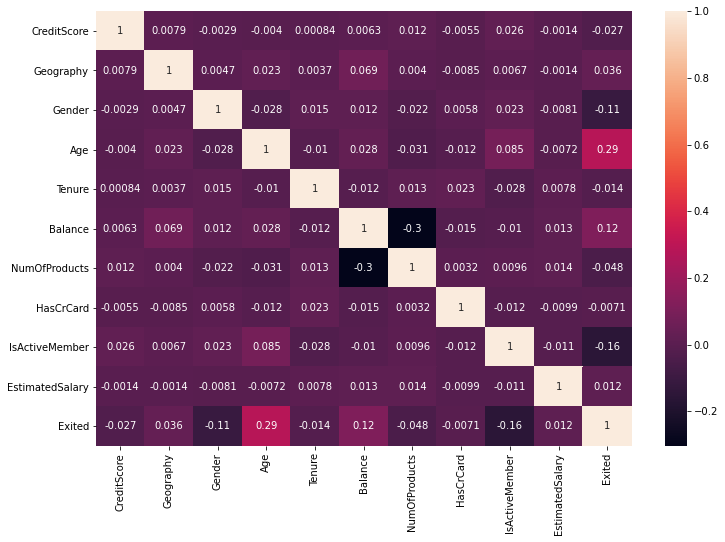

In [60]:
sns.heatmap(bcdroped.corr(), annot = True)

In [61]:
# Model Building

In [62]:
x = bcdroped.drop("Exited", axis = 1)
y = bcdroped.pop("Exited")

In [64]:
x_train, x_test, y_train ,y_test = train_test_split(x,y, test_size = .30, random_state=0)

In [65]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7681,641,0,1,33,2,146193.60,2,1,1,55796.83
9031,541,0,1,39,7,0.00,2,1,0,19823.02
3691,590,0,0,76,5,160979.68,1,0,1,13848.58
202,516,2,1,50,5,0.00,1,0,1,146145.93
5625,508,0,0,60,7,143262.04,1,1,1,129562.74


In [66]:
y_train.head()

7681    1
9031    0
3691    0
202     1
5625    0
Name: Exited, dtype: int64

In [67]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [86]:
dt = DecisionTreeClassifier(criterion = "gini", max_depth=10, max_leaf_nodes=10, min_samples_split = 100, min_samples_leaf=5, max_features=7)

In [87]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features=7, max_leaf_nodes=10,
                       min_samples_leaf=5, min_samples_split=100)

In [90]:
ytrainp = dt.predict(x_train)
ytestp = dt.predict(x_test)

In [ ]:
# Confusion matrix and classification Reports

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Confusion Matrix

In [91]:
confusion_matrix(y_train, ytrainp)

array([[5370,  214],
       [ 820,  596]], dtype=int64)

In [92]:
confusion_matrix(y_test, ytestp)

array([[2271,  108],
       [ 312,  309]], dtype=int64)

In [93]:
print(classification_report(y_train, ytrainp))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5584
           1       0.74      0.42      0.54      1416

    accuracy                           0.85      7000
   macro avg       0.80      0.69      0.72      7000
weighted avg       0.84      0.85      0.84      7000



In [94]:
print(classification_report(y_test, ytestp))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2379
           1       0.74      0.50      0.60       621

    accuracy                           0.86      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



In [129]:
param_grid = {"max_depth":[5,6,7,9,11],
                "min_samples_leaf":[15,20,30,40,50], "min_samples_split":[20,30,40,50,70,100,120]}

In [130]:
dt = DecisionTreeClassifier()

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
bcdroped_grid = GridSearchCV(estimator = dt, param_grid = param_grid, cv= 3)

In [133]:
bcdroped_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 9, 11],
                         'min_samples_leaf': [15, 20, 30, 40, 50],
                         'min_samples_split': [20, 30, 40, 50, 70, 100, 120]})

In [134]:
bcdroped_best_grid = bcdroped_grid.fit(x_train,y_train)

In [136]:
bcdroped_best_grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 20, 'min_samples_split': 70}

In [138]:
bcdroped_best = bcdroped_best_grid.best_estimator_

In [139]:
ytrain_grid_predict = bcdroped_best.predict(x_train)
ytest_grid_predict = bcdroped_best.predict(x_test)

In [140]:
confusion_matrix(ytrain, ytrain_grid_predict)

array([[5985,  258],
       [ 140,  617]], dtype=int64)

In [141]:
confusion_matrix(ytest,ytest_grid_predict)

array([[2490,  127],
       [  72,  311]], dtype=int64)

In [143]:
print(classification_report(ytrain, ytrain_grid_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6243
           1       0.71      0.82      0.76       757

    accuracy                           0.94      7000
   macro avg       0.84      0.89      0.86      7000
weighted avg       0.95      0.94      0.94      7000



In [144]:
print(classification_report(ytest, ytest_grid_predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2617
           1       0.71      0.81      0.76       383

    accuracy                           0.93      3000
   macro avg       0.84      0.88      0.86      3000
weighted avg       0.94      0.93      0.94      3000



In [ ]:
# ROC curves

In [160]:
xtrain_prob = bcdroped_best.predict_proba(x_train)

In [161]:
xtrain_prob = xtrain_prob[:,1]

In [162]:
xtrain_prob

array([0.06049822, 0.        , 0.        , ..., 0.05      , 0.01041667,
       0.76811594])

In [163]:
auc = roc_auc_score(y_train, xtrain_prob)

In [172]:
auc

0.8924860224127048

Auc:0.892


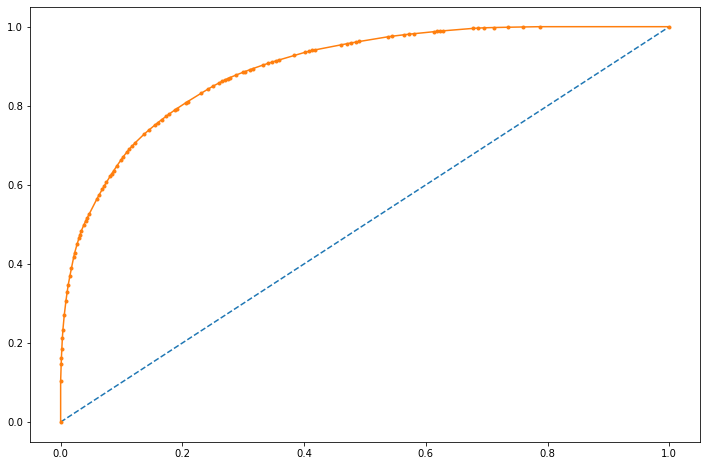

In [174]:
fpr, tpr, thresholds = roc_curve(y_train, xtrain_prob)
plt.plot([0,1],[0,1], linestyle = "--")
plt.plot(fpr,tpr,marker = ".")
print("Auc:%.3f" %auc)

In [175]:
xtest_prob = bcdroped_best.predict_proba(x_test)

In [176]:
xtest_prob

array([[0.56692913, 0.43307087],
       [0.55555556, 0.44444444],
       [0.77941176, 0.22058824],
       ...,
       [1.        , 0.        ],
       [0.8852459 , 0.1147541 ],
       [0.46153846, 0.53846154]])

In [177]:
xtest_prob = xtest_prob[:,1]

In [180]:
auctest = roc_auc_score(y_test, xtest_prob)

In [181]:
auctest

0.8523270241017924

Auc:0.852


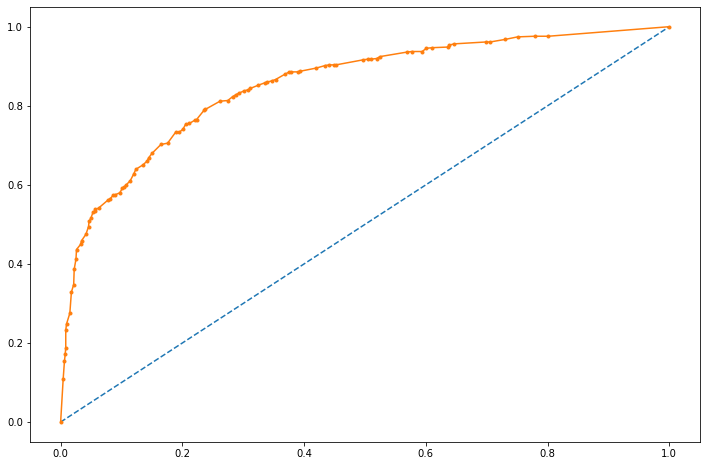

In [199]:
fpr,tpr, thresholds = roc_curve(y_test, xtest_prob)
plt.plot([0,1],[0,1],linestyle ="--")
plt.plot(fpr,tpr,marker=".")
print("Auc:%.3f" %auctest)

In [200]:
bcdroped.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Geography'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

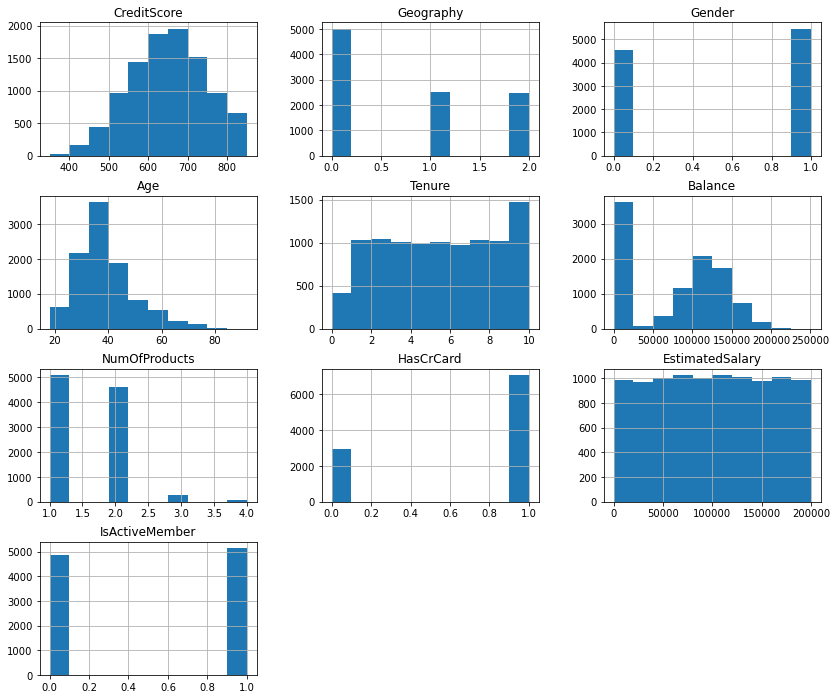

In [220]:
bcdropedhistogram = ["CreditScore", 'Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard',
                     'EstimatedSalary','IsActiveMember']
bcdroped.hist(column = bcdropedhistogram, figsize = (14,12))

In [222]:
import pickle

In [223]:
filename  = "Finalised_model.pickle"
pickle.dump(bcdroped_grid, open(filename,"wb"))